In [1]:
from periomod.wrapper import BenchmarkWrapper, EvaluatorWrapper

wrapper = BenchmarkWrapper(
    task="pocketclosureinf",
    encodings=["target", "one_hot"],
    learners=["xgb", "lr", "rf", "mlp"],
    tuning_methods=["holdout"],
    hpo_methods=["hebo", "rs"],
    criteria=["f1", "brier_score"],
    sampling=[None],
    factor=None,
    n_configs=50,
    n_jobs=-1,
    threshold_tuning=False,
)

wrapper.baseline()

,Model,Encoding,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,Dummy Classifier,target,0.000000,0.000000,0.000000,0.621685,0.235741,0.500000,"[[0, 1441], [0, 2368]]",None
1,Logistic Regression,target,0.520842,0.683973,0.420541,0.707272,0.195362,0.739965,"[[606, 835], [280, 2088]]",None
2,Random Forest,target,0.543846,0.646890,0.469119,0.702284,0.198358,0.728447,"[[676, 765], [369, 1999]]",None
3,Dummy Classifier,one_hot,0.000000,0.000000,0.000000,0.621685,0.235741,0.500000,"[[0, 1441], [0, 2368]]",None
4,Logistic Regression,one_hot,0.540854,0.672165,0.452464,0.709373,0.193864,0.743512,"[[652, 789], [318, 2050]]",None
5,Random Forest,one_hot,0.517902,0.647242,0.431645,0.695983,0.201294,0.723249,"[[622, 819], [339, 2029]]",None


In [3]:
benchmark, learners = wrapper.wrapped_benchmark()
wrapper.save_benchmark(
    benchmark_df=benchmark,
    file_name="pocketclosureinf_experiments.csv",
    folder_name="pocketclosureinf",
)
wrapper.save_learners(
    learners_dict=learners, folder_name="pocketclosureinf_experiments"
)

Suppressed NotPSDError for pocketclosureinf, mlp due toconvergence issue 

Suppressed NotPSDError for pocketclosureinf, mlp due toconvergence issue 

Saved benchmark report to /Users/toby/periodontal-modeling/reports/pocketclosureinf/pocketclosureinf_experiments.csv
Saved model pocketclosureinf_lr_holdout_hebo_f1_one_hot_no_sampling_factorNone_rank1_score0.6239 to /Users/toby/periodontal-modeling/models/pocketclosureinf_experiments/pocketclosureinf_lr_holdout_hebo_f1_one_hot_no_sampling_factorNone_rank1_score0.6239.pkl
Saved model pocketclosureinf_lr_holdout_rs_f1_one_hot_no_sampling_factorNone_rank2_score0.6239 to /Users/toby/periodontal-modeling/models/pocketclosureinf_experiments/pocketclosureinf_lr_holdout_rs_f1_one_hot_no_sampling_factorNone_rank2_score0.6239.pkl
Saved model pocketclosureinf_lr_holdout_rs_f1_target_no_sampling_factorNone_rank3_score0.62 to /Users/toby/periodontal-modeling/models/pocketclosureinf_experiments/pocketclosureinf_lr_holdout_rs_f1_target_no_sampling_fact

In [2]:
from periomod.wrapper import load_benchmark, load_learners

benchmark = load_benchmark(file_name="pocketclosureinf_experiments.csv",
                           folder_name="pocketclosureinf",)
learners = load_learners(folder_name="pocketclosureinf_experiments")

In [10]:
evaluator = EvaluatorWrapper(
    learners_dict=learners,
    criterion="f1",
    aggregate=True,
)

In [11]:
evaluator.average_over_splits()

,Task,Learner,Criterion,Sampling,Factor,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Best Threshold,Confusion Matrix
0,pocketclosureinf,lr,f1,None,None,0.6053,0.5505,0.673,0.6877,0.2065,0.7405,None,"[[969, 468], [787, 1799]]"


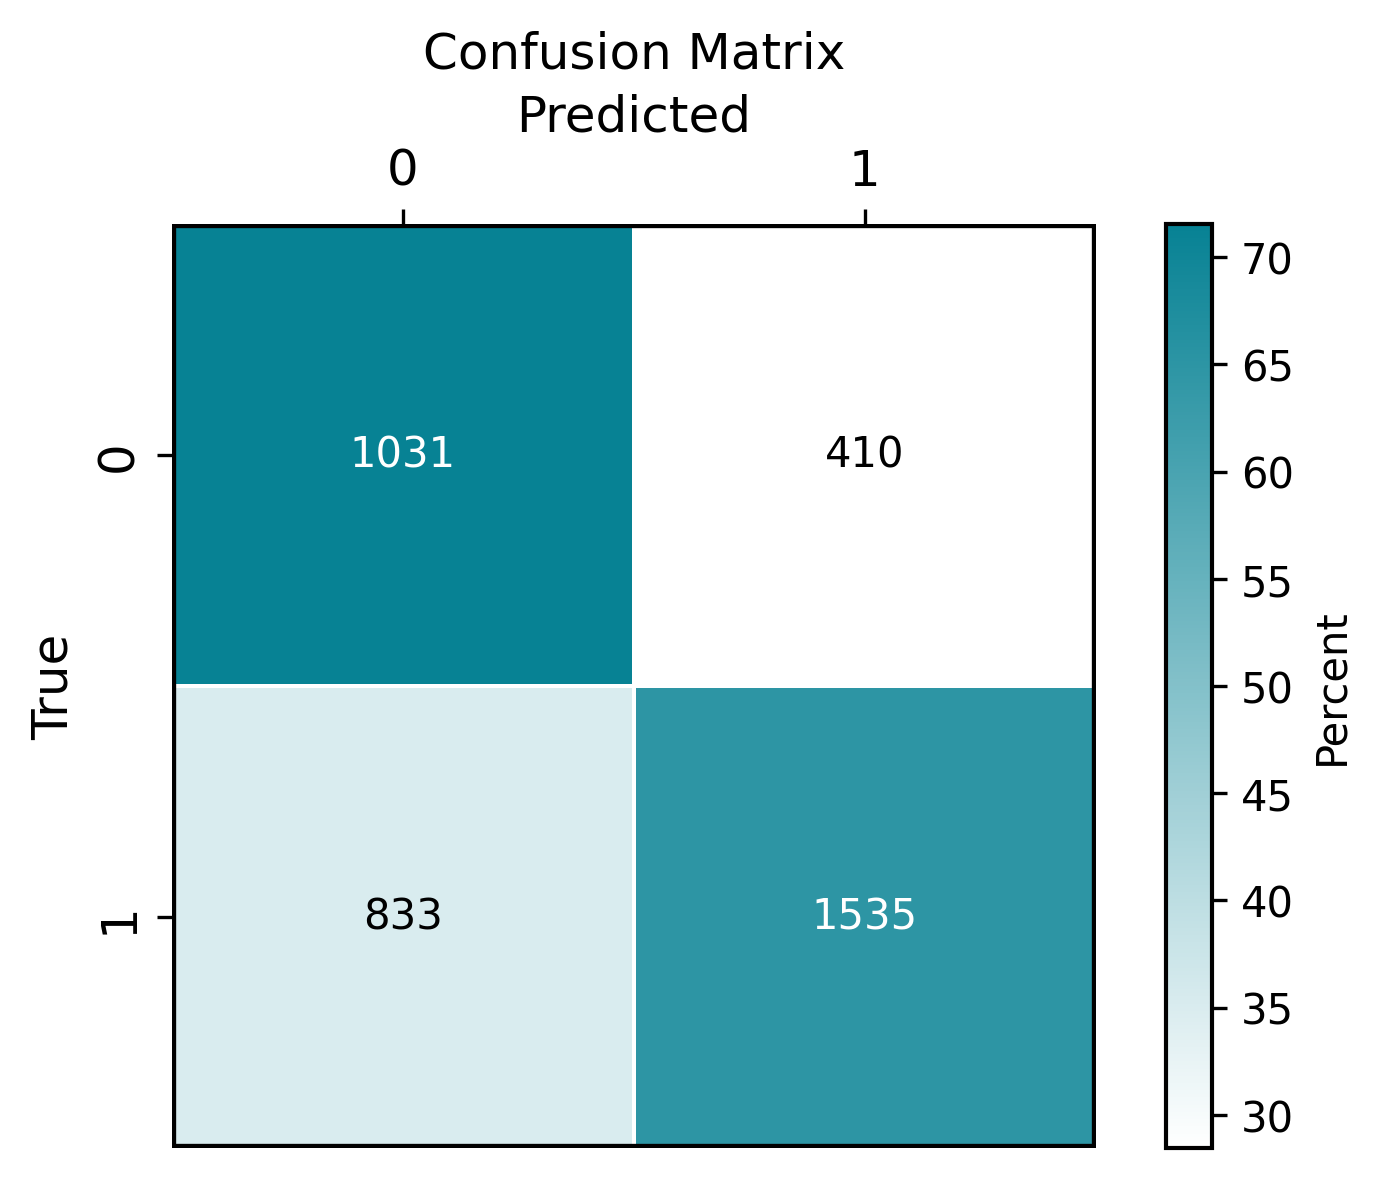

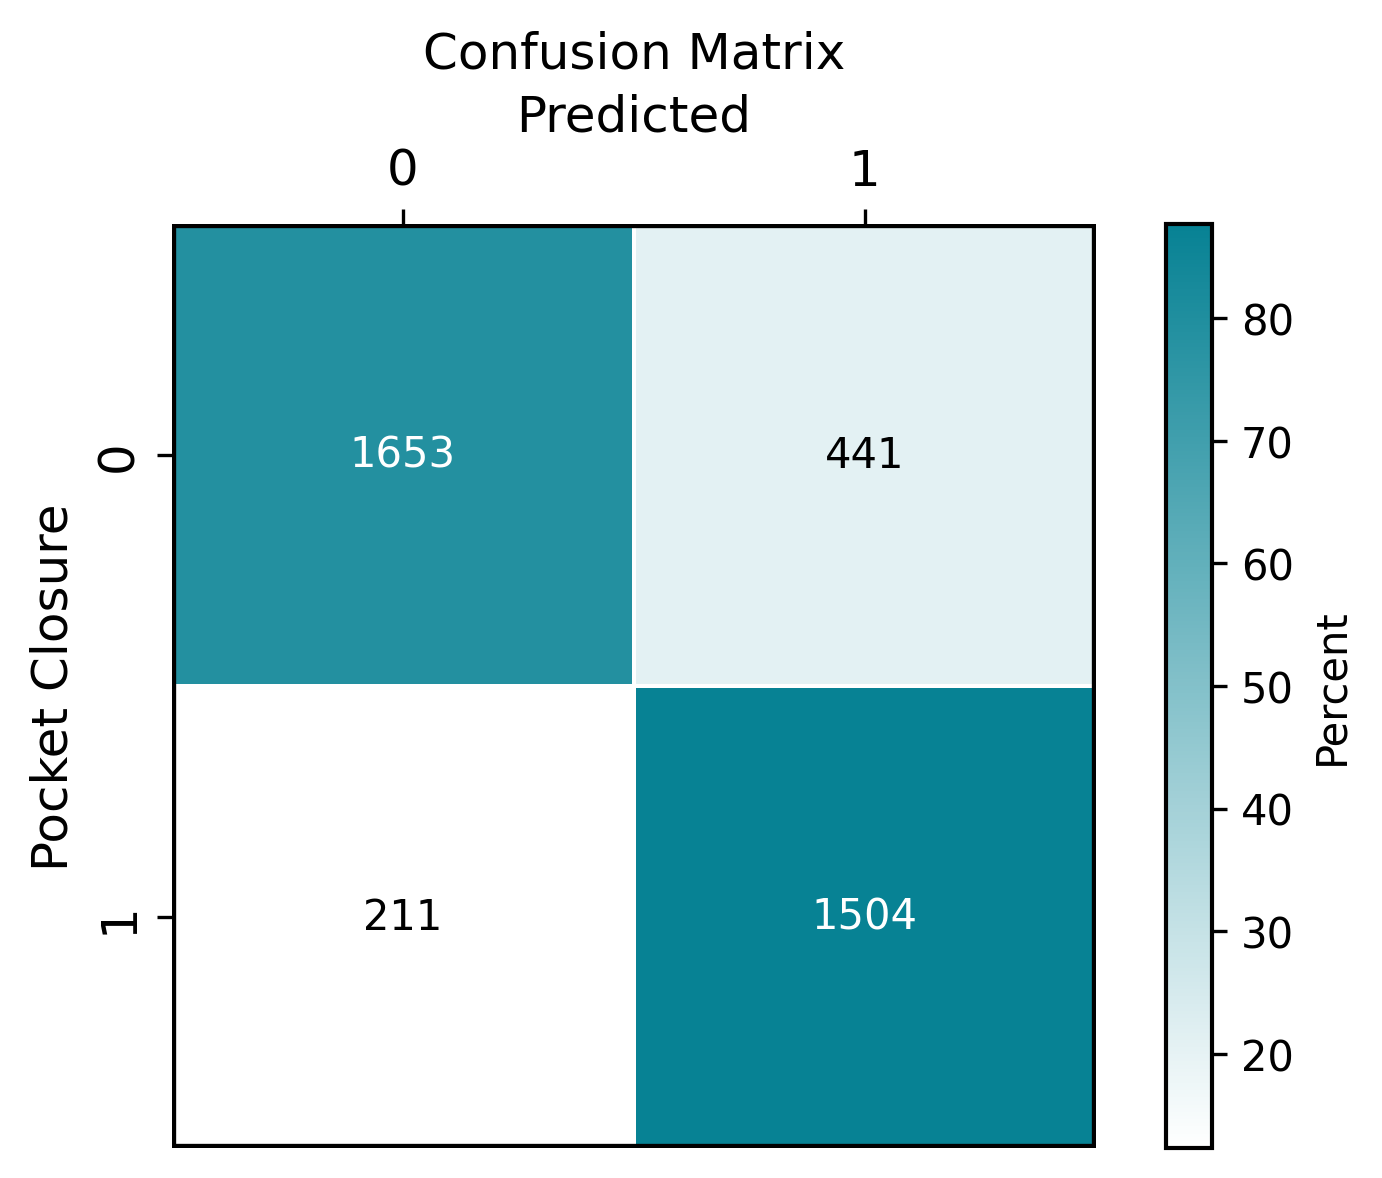

Average and Median Brier Scores by y:
   y      mean    median
0  0  0.189212  0.142227
1  1  0.223686  0.174782


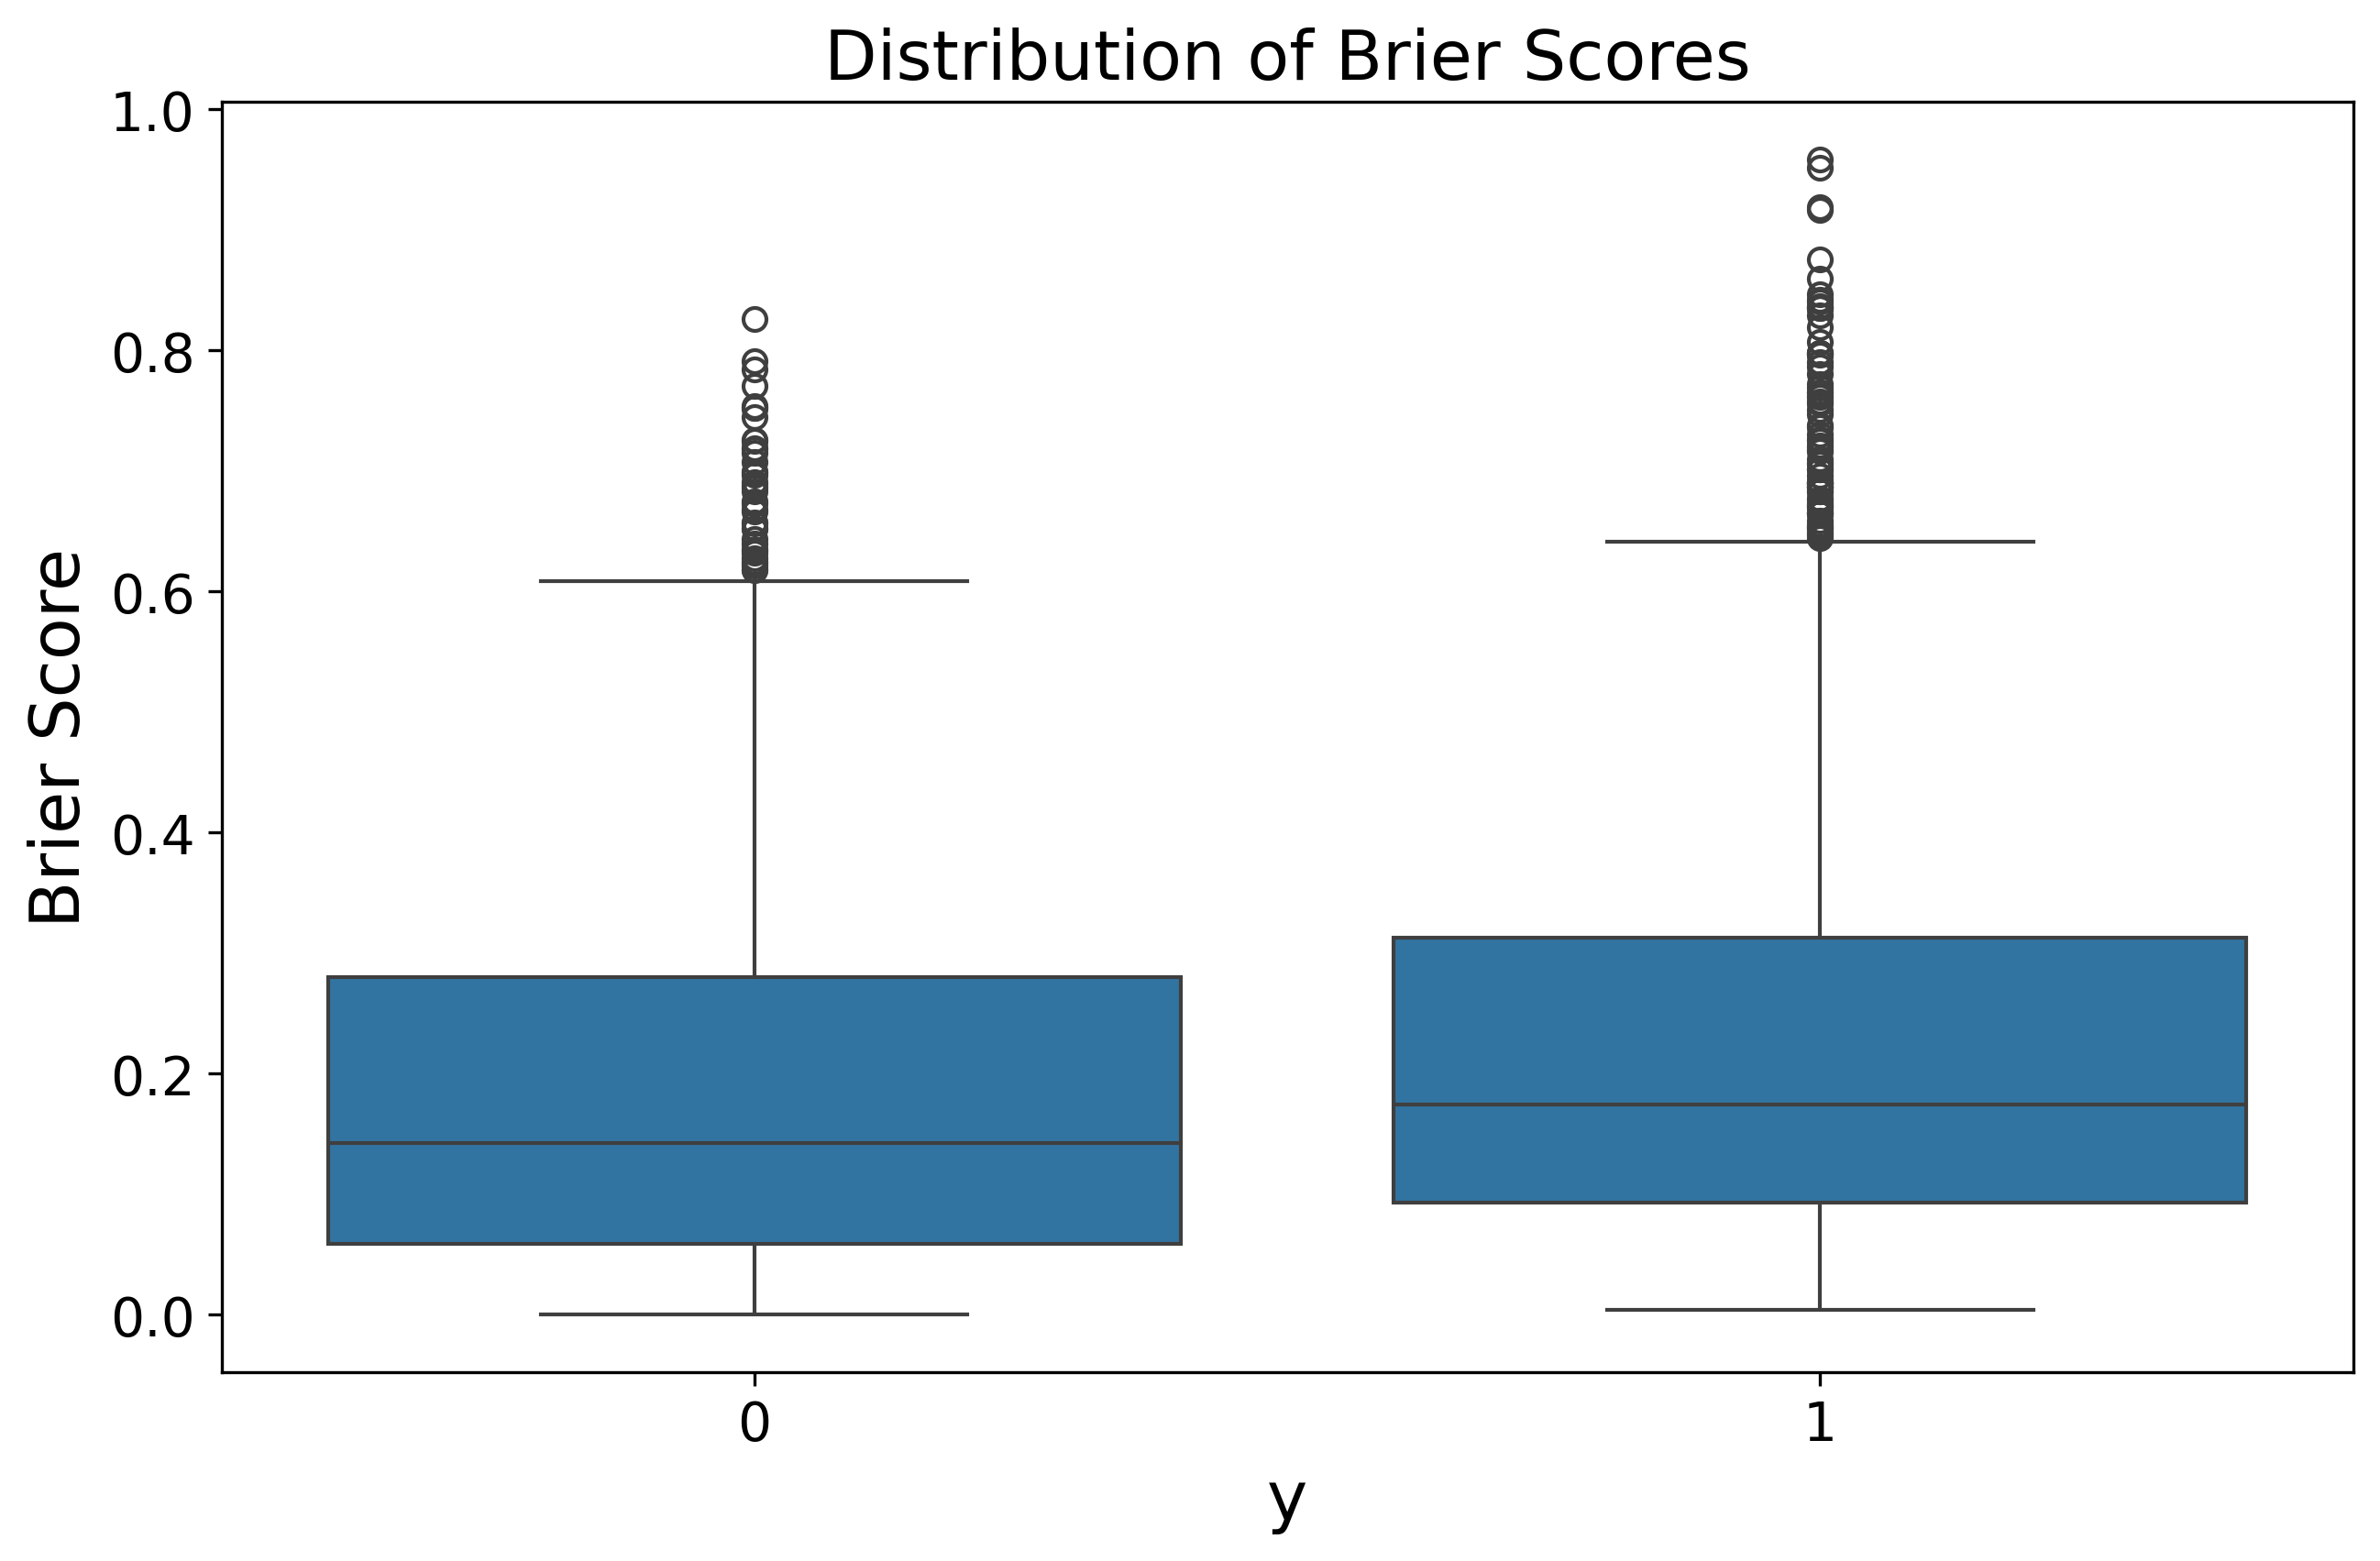


Mean Brier Score per cluster:
 Cluster
0    0.206869
1    0.221489
2    0.222976
Name: Brier_Score, dtype: float64 

Number of observations per cluster:
 Cluster
0    2883
1     362
2     564
Name: count, dtype: int64


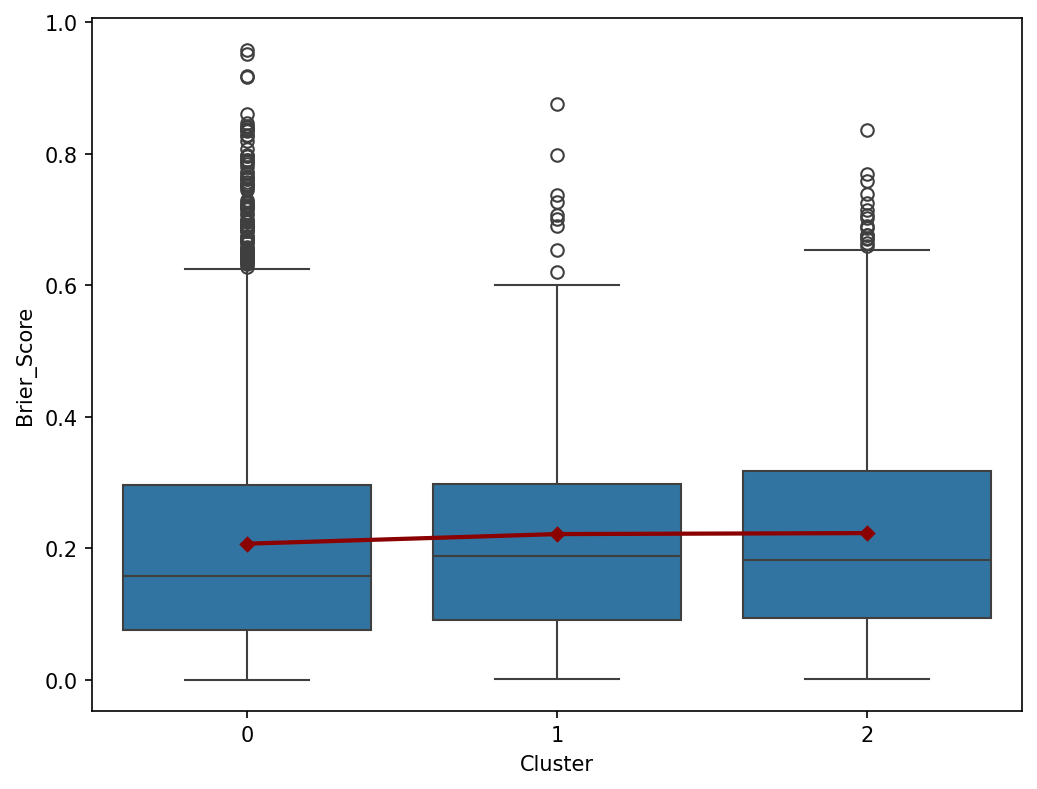

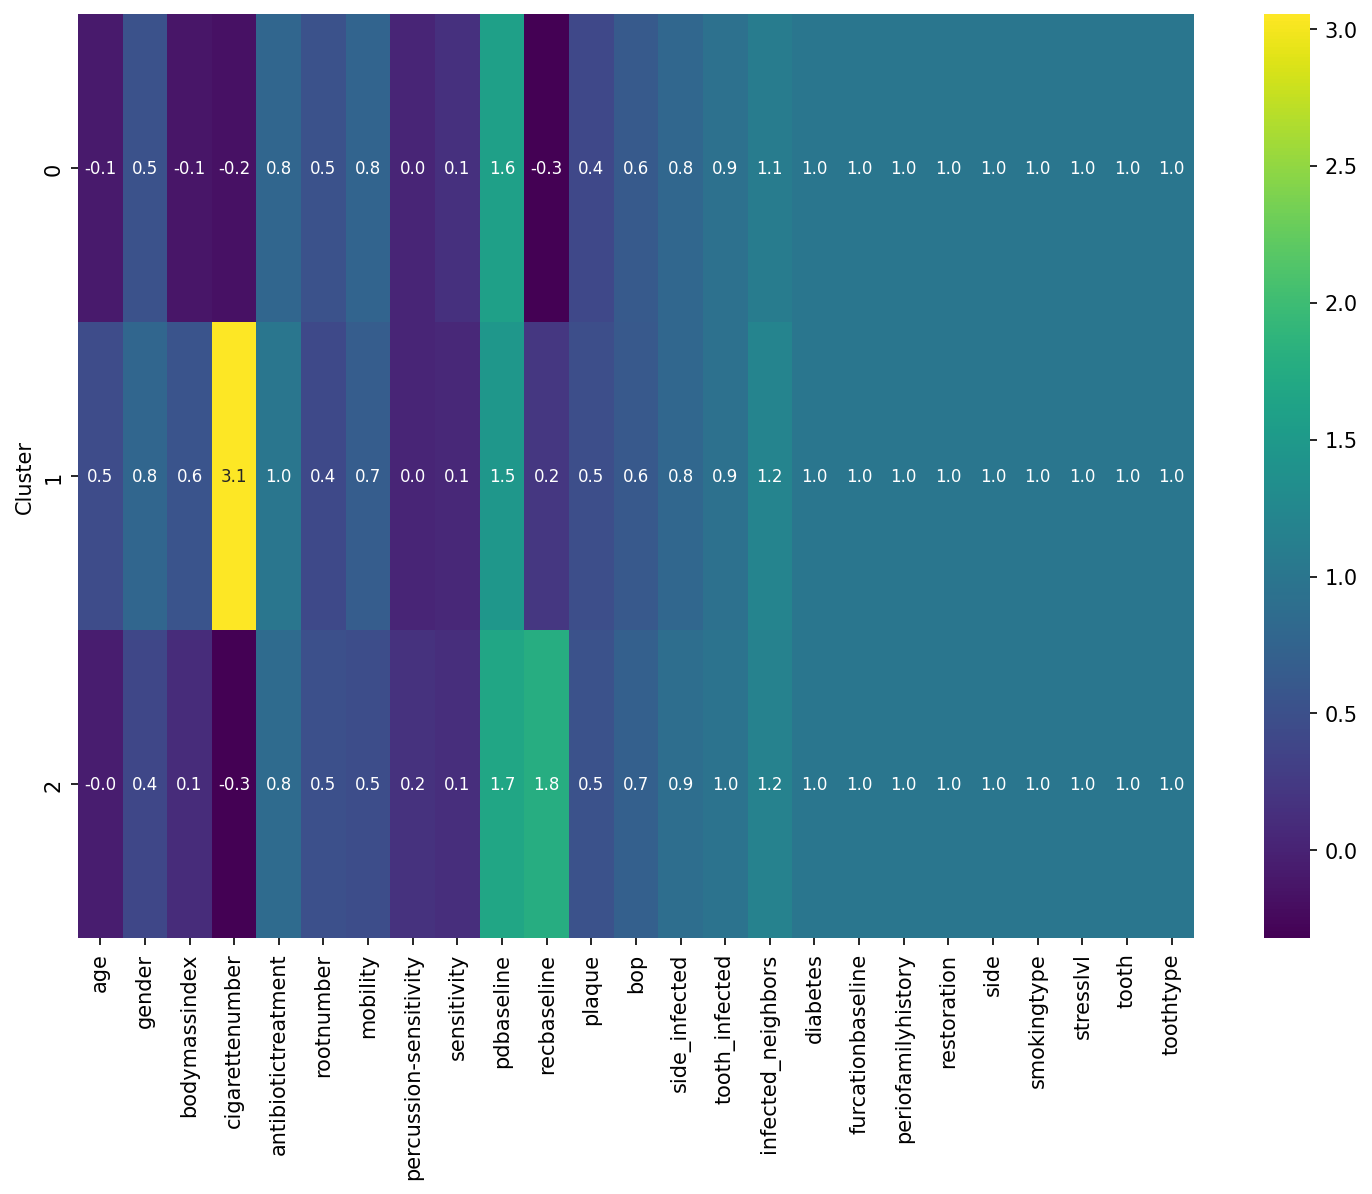

In [12]:
evaluator.wrapped_evaluation()

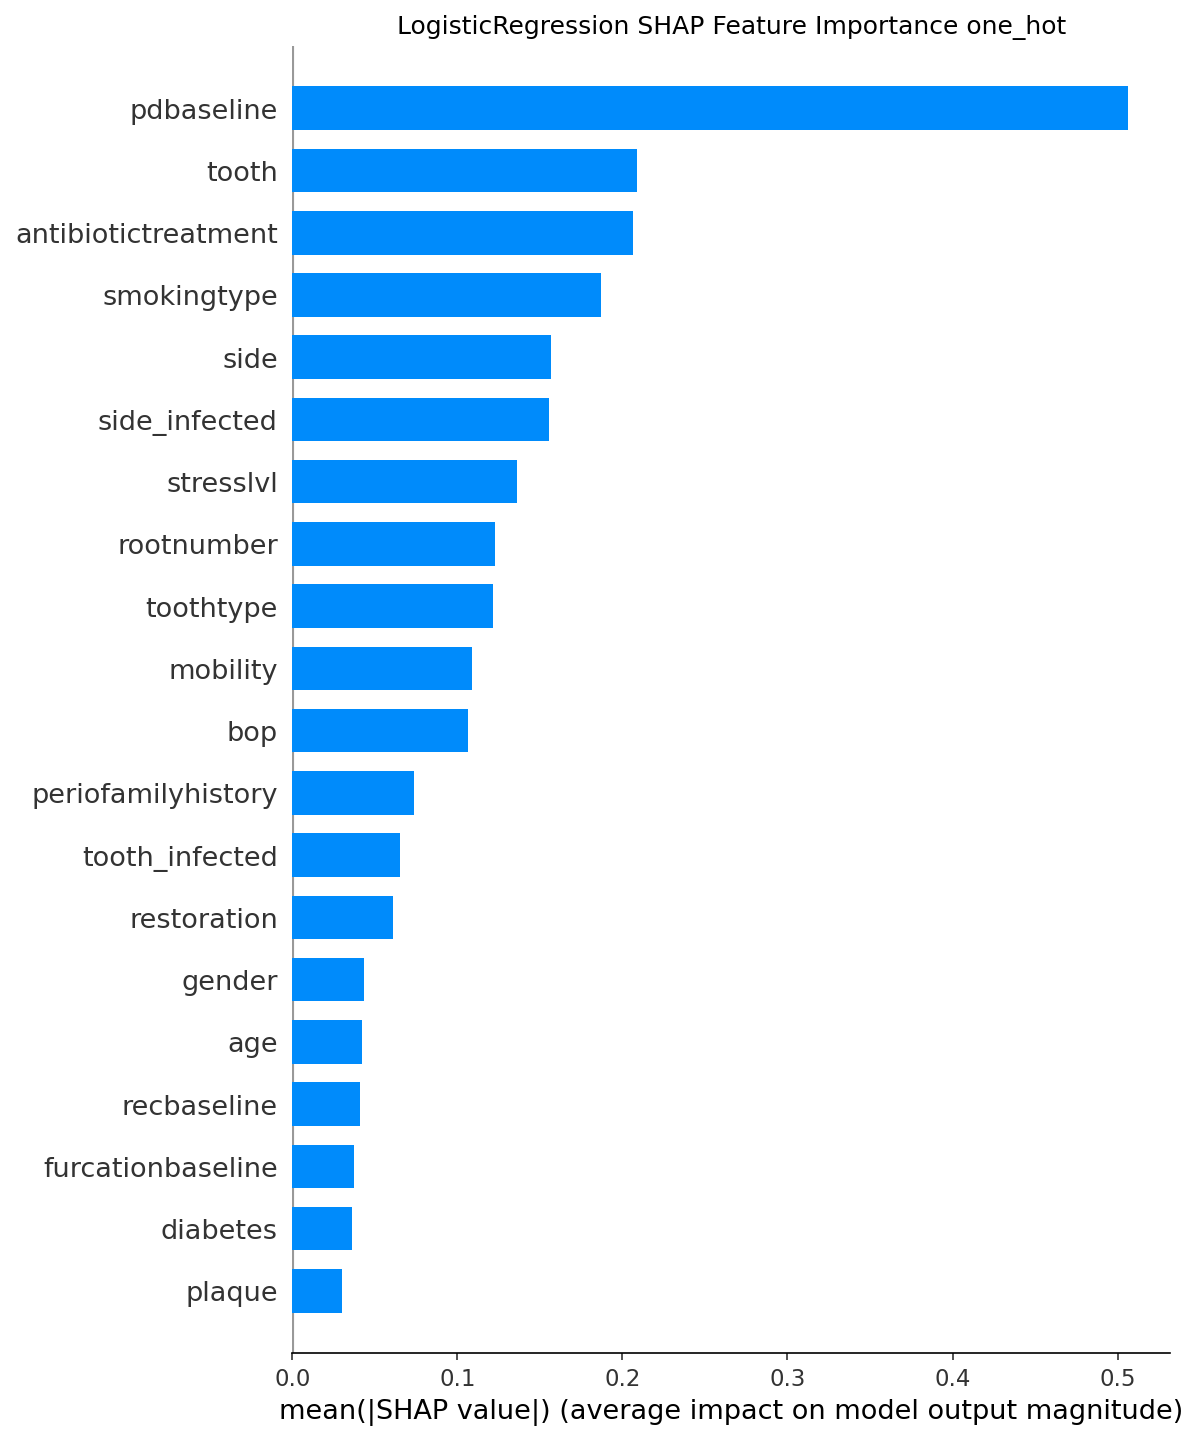

In [9]:
evaluator.evaluate_feature_importance(fi_types=["shap"])